In [7]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# data example
* 첫번째 열은 무시하도록 되어 있음
    * 아래 예시의 경우 value, value2 값만 가지고 cdf를 그리게 됨
* 수정하려면 하단 main의 cols 할당 부분에 [1:]을 지워주면 됨

In [8]:
data = pd.read_csv('./temp.csv')
data

,user_id,value,value2
0,a,3,1
1,b,5,2
2,a,3,5
3,b,5,3
4,a,3,2
5,b,5,1
6,a,3,6
7,b,5,7
8,a,3,12
9,b,5,44


# parameters
* 축 설명 폰트 크기, 그래프 크기, 그래프 색깔, 그래프 굵기
* 제목, 제목 크기
* legend 위치
* 축 이름
* 축 수치 글씨 크기
* 읽을 데이터 위치, 저장 위치
* 기본적으로 legend 이름은 column 값을 따르는데, 수정하려면 값 넣으면 됨 (list로)

In [31]:

## , in ticks
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

### Main features

font_size = 16 # axis title size
fig_size = (6,4) #width,height
colors = ['b','r','g','y'] #color pick
line_width = 3
title = "title_example"
title_size = 22

yaxis_fontsize = 12 # axis number size
xaxis_fontsize = 12

# best, upper right, upper left, lower left, lower right, right, center left, center right, lower center, upper center, center
legend_loc = "lower right"

xaxis = "x_example"
yaxis = "y_example"

data_path = "./temp.csv"
save_path = "./fig1.png"

legend_name=[]
legend_fontsize=12

# main

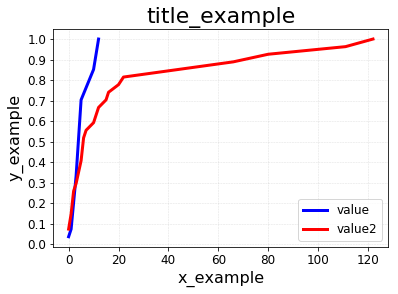

In [33]:
cols = data.columns[1:]
fig, ax = plt.subplots(figsize=fig_size)

if len(legend_name)==0:
    legend_name = cols
    
for idx,col in enumerate(cols):
    cdf = data.groupby([col]).size().reset_index(name="counts")
    sums = sum(cdf['counts'])
    cdf['cdf'] = cdf.counts.cumsum()/sums
    
    ax.plot(cdf[col],cdf['cdf'],linewidth=line_width,color=colors[idx],label=legend_name[idx])
    ax.xaxis.set_major_formatter(tick) 
plt.title(title,fontsize=title_size)
plt.legend(loc=legend_loc,fontsize=legend_fontsize)
plt.xlabel(xaxis,fontsize=font_size)
plt.ylabel(yaxis,fontsize=font_size)

plt.xticks(fontsize=xaxis_fontsize)
plt.yticks(np.arange(0,1.1,0.1),fontsize=yaxis_fontsize)

plt.grid(alpha=.4, linewidth=.5, linestyle='--')
plt.savefig(save_path,format='png')

plt.show()